In [12]:
import matplotlib.pyplot as plt


In [11]:
import pandas as pd
import numpy as np

Text(0.5, 1.0, 'PMF')

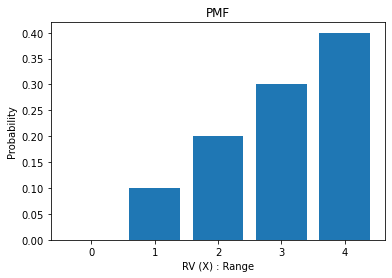

In [3]:

pmf = {'0':0, '1': 0.1, '2': 0.2, '3':0.3, '4':0.4}
plt.bar(pmf.keys(),pmf.values())
plt.xlabel("RV (X) : Range")
plt.ylabel("Probability")
plt.title("PMF")


In [13]:
df = pd.read_csv("LungCapDataset")
df

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


In [5]:
df.columns

Index(['LungCap', 'Age', 'Height', 'Smoke', 'Gender', 'Caesarean'], dtype='object')

In [6]:
df["Age"].value_counts()

13    69
12    68
15    64
11    58
14    56
16    54
10    51
18    43
17    43
8     41
9     40
19    37
7     37
6     25
5     20
3     13
4      6
Name: Age, dtype: int64

In [7]:
df["AgeGrp"] = pd.cut(df["Age"], bins = [0,5,10,15,20],
                      labels = ["Toddler","Child","Teen","Young_Adult"])
df

,LungCap,Age,Height,Smoke,Gender,Caesarean,AgeGrp
0,6.475,6,62.1,no,male,no,Child
1,10.125,18,74.7,yes,female,no,Young_Adult
2,9.550,16,69.7,no,female,yes,Young_Adult
3,11.125,14,71.0,no,male,no,Teen
4,4.800,5,56.9,no,male,no,Toddler
...,...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no,Child
721,9.050,18,72.0,yes,male,yes,Young_Adult
722,3.850,11,60.5,yes,female,no,Teen
723,9.825,15,64.9,no,female,no,Teen


In [8]:
df.columns

Index(['LungCap', 'Age', 'Height', 'Smoke', 'Gender', 'Caesarean', 'AgeGrp'], dtype='object')

In [9]:
x = df["AgeGrp"].value_counts()
x

Teen           315
Child          194
Young_Adult    177
Toddler         39
Name: AgeGrp, dtype: int64

In [10]:
df.shape

(725, 7)

In [11]:
x = df["AgeGrp"].value_counts()/df.shape[0]
x

Teen           0.434483
Child          0.267586
Young_Adult    0.244138
Toddler        0.053793
Name: AgeGrp, dtype: float64

In [82]:
y = df["Smoke"].value_counts(normalize = True).loc[['yes','no']]
y

yes    0.106207
no     0.893793
Name: Smoke, dtype: float64

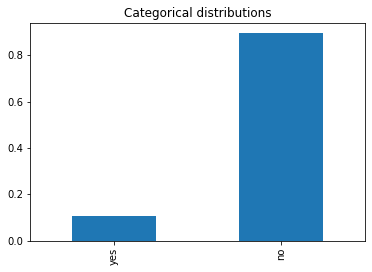

In [84]:
y = df["Smoke"].value_counts(normalize = True).loc[['yes','no']].plot(kind = 'bar',title = 'Categorical distributions')

Text(0, 0.5, 'Frequency')

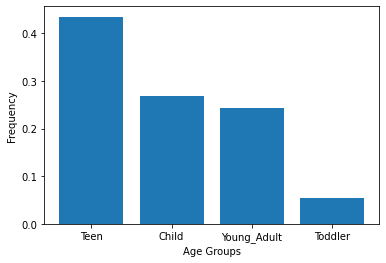

In [12]:
plt.bar(x.index,x.values)
plt.xlabel("Age Groups")
plt.ylabel("Frequency")

In [13]:
###find probability of p(X=baby,child)
x["Child"]+x["Toddler"]


0.3213793103448276

In [14]:
###verify probabilities are 1
x.values.sum()

1.0

In [15]:
gs = (df[['Smoke','Gender']].value_counts()/df.shape[0])
gs

Smoke  Gender
no     male      0.460690
       female    0.433103
yes    female    0.060690
       male      0.045517
dtype: float64

In [16]:
gs.values

array([0.46068966, 0.43310345, 0.06068966, 0.04551724])

In [17]:
gs.index


MultiIndex([( 'no',   'male'),
            ( 'no', 'female'),
            ('yes', 'female'),
            ('yes',   'male')],
           names=['Smoke', 'Gender'])

In [18]:
index = []
freq = []
for i in gs.index:
    print (i)
    print (gs.loc[i])
    index.append(str(i))
    freq.append(gs.loc[i])

('no', 'male')
0.4606896551724138
('no', 'female')
0.43310344827586206
('yes', 'female')
0.060689655172413794
('yes', 'male')
0.04551724137931035


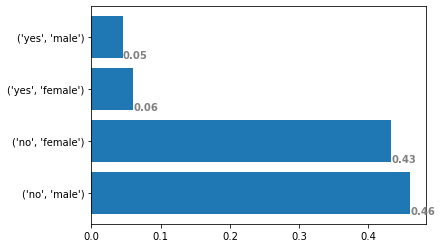

In [19]:
fig,ax = plt.subplots()
bars = ax.barh(index,freq)
for i in ax.patches:
    plt.text(i.get_width(), i.get_y(), 
            str(round((i.get_width()),2)), fontsize=10, fontweight = 'bold',color ='grey')

<AxesSubplot:xlabel='Smoke,Gender'>

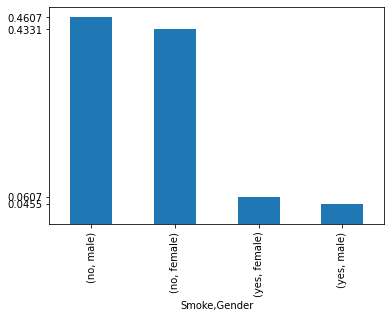

In [20]:
gs.plot.bar(yticks = freq)

In [15]:
###Density plot using seaborn
import seaborn as sns

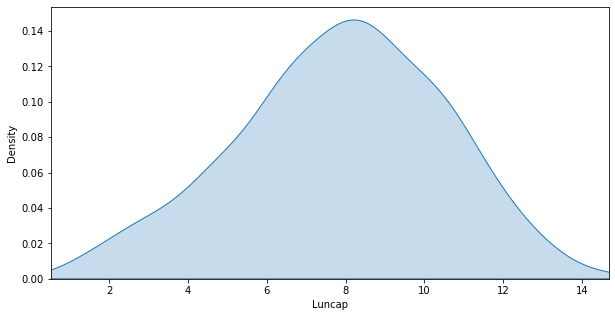

In [22]:
plt.figure(figsize=(10,5))
plt.xlim(df["LungCap"].min(),df["LungCap"].max())
plt.xlabel("Luncap")
plt.ylabel("Density")
sns.kdeplot(df["LungCap"],shade = True)
plt.show()


<AxesSubplot:xlabel='Age Groups', ylabel='Frequency'>

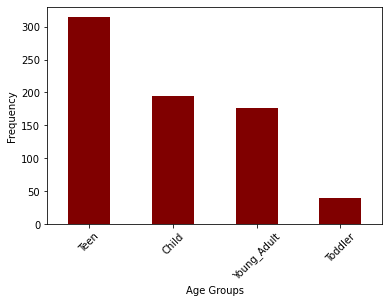

In [23]:
df['AgeGrp'].value_counts().plot.bar(xlabel="Age Groups",ylabel="Frequency",color="maroon",rot="45")


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LungCap', ylabel='Density'>

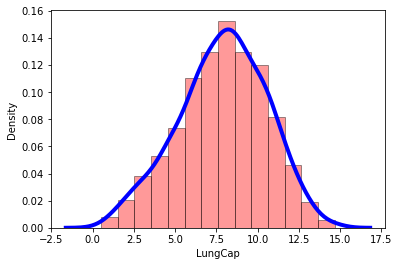

In [16]:
sns.distplot(df["LungCap"], hist = True, kde = True,
             bins = int(df["LungCap"].max()),color = "red",
             hist_kws = {'edgecolor': 'black'},
             kde_kws = {'linewidth':4,'color':'blue'}
                        )



<AxesSubplot:xlabel='LungCap', ylabel='Count'>

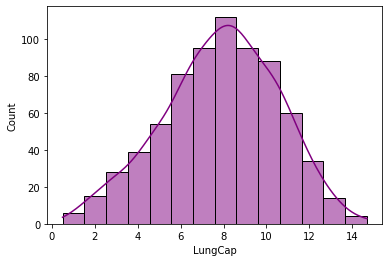

In [25]:
sns.histplot(df["LungCap"], color = 'purple', kde = True, bins = int(df["LungCap"].max()))


In [26]:
mu = df["LungCap"].mean()
mu

7.863147586206895

In [27]:
std = df["LungCap"].std()
std

2.662008248678719

In [28]:
df

,LungCap,Age,Height,Smoke,Gender,Caesarean,AgeGrp
0,6.475,6,62.1,no,male,no,Child
1,10.125,18,74.7,yes,female,no,Young_Adult
2,9.550,16,69.7,no,female,yes,Young_Adult
3,11.125,14,71.0,no,male,no,Teen
4,4.800,5,56.9,no,male,no,Toddler
...,...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no,Child
721,9.050,18,72.0,yes,male,yes,Young_Adult
722,3.850,11,60.5,yes,female,no,Teen
723,9.825,15,64.9,no,female,no,Teen


In [29]:
mean_h = df["Height"].mean()
mean_h

64.83627586206904

In [30]:
var_h = df["Height"].var()
var_h

51.870878376833716

In [31]:
##variance formula:: E[X^2]-(E[X])^2
(df["Height"]*df["Height"]).mean() - (mean_h*mean_h)        
        

51.799332337681335

In [32]:
var_age = df["Age"].var()
var_age

16.038018670222904

In [33]:
mean_age = df["Age"].mean()
mean_age

12.326896551724138

In [34]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from numpy.random import normal
from numpy import hstack

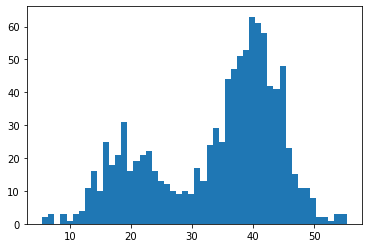

In [42]:
###generate random samples
sample1 = normal(loc =20,scale =5,size=300)  ##loc is mean; scale is std.dev; size = no.of values
sample2 = normal(loc =40,scale =5,size= 700)
sample = hstack((sample1,sample2)) ## hstack --> concatenate two samples
#plot histogram
plt.hist(sample,bins=50)
plt.show()

In [45]:
import statsmodels.api as sm
##generate the EDF from the above sample
ecdf = sm.distributions.ECDF(sample)
ecdf

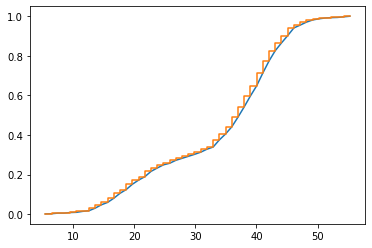

In [49]:
x = np.linspace(min(sample),max(sample))
y = ecdf(x)
plt.plot(x,y)
plt.step(x,y) ##step graph
plt.show()


<BarContainer object of 50 artists>

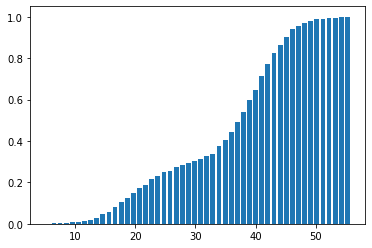

In [51]:

x = np.linspace(min(sample),max(sample))
y = ecdf(x) 
plt.show()
plt.bar(x,y)

In [47]:
min(sample)

5.447740572963182

In [48]:
max(sample)

55.279543112867614

In [57]:
##Get cumulative probablities for values

print('P(x<1): %.3f' %ecdf(1))
print('P(x<10): %.3f' %ecdf(10))
print('P(x<20): %.3f' %ecdf(20))
print('P(x<40): %.3f' %ecdf(40))
print('P(x<60): %.3f' %ecdf(60))

P(x<1): 0.000
P(x<10): 0.009
P(x<20): 0.154
P(x<40): 0.646
P(x<60): 1.000


<AxesSubplot:ylabel='Frequency'>

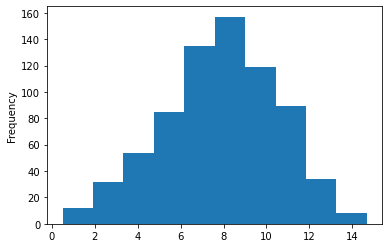

In [59]:
df["LungCap"].plot(kind = 'hist')


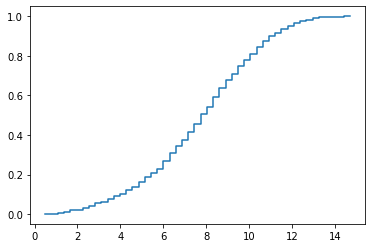

In [61]:
ecdf = sm.distributions.ECDF(df["LungCap"])
x=np.linspace(df["LungCap"].min(),df["LungCap"].max())
y = ecdf(x)
plt.step(x,y)
plt.show()

In [69]:
print('P(x<1): %.3f' %ecdf(1))
print('P(x<2): %.3f' %ecdf(2))
print('P(x<4): %.3f' %ecdf(4))
print('P(x<6): %.3f' %ecdf(6))
print('P(x<8): %.3f' %ecdf(8))
print('P(x<9): %.3f' %ecdf(9))
print('P(x<10): %.3f' %ecdf(10))
print('P(x<11): %.3f' %ecdf(11))
print('P(x<12): %.3f' %ecdf(12))
print('P(x<13): %.3f' %ecdf(13))
print('P(x<14): %.3f' %ecdf(14))
print('P(x<15): %.3f' %ecdf(15))
print('P(x<16): %.3f' %ecdf(16))

P(x<1): 0.001
P(x<2): 0.021
P(x<4): 0.091
P(x<6): 0.230
P(x<8): 0.506
P(x<9): 0.655
P(x<10): 0.775
P(x<11): 0.886
P(x<12): 0.949
P(x<13): 0.982
P(x<14): 0.996
P(x<15): 1.000
P(x<16): 1.000


<AxesSubplot:ylabel='Frequency'>

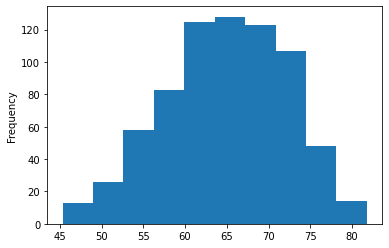

In [70]:
##Height
df["Height"].plot(kind = 'hist')

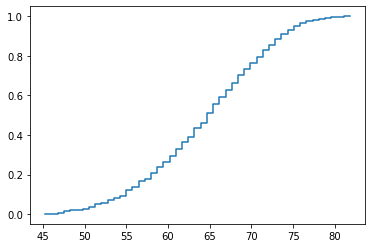

In [71]:
ecdf = sm.distributions.ECDF(df["Height"])
x=np.linspace(df["Height"].min(),df["Height"].max())
y = ecdf(x)
plt.step(x,y)
plt.show()

In [74]:

print('P(x<40): %.3f' %ecdf(40))
print('P(x<45): %.3f' %ecdf(45))
print('P(x<50): %.3f' %ecdf(50))
print('P(x<55): %.3f' %ecdf(55))
print('P(x<60): %.3f' %ecdf(60))
print('P(x<65): %.3f' %ecdf(65))
print('P(x<70): %.3f' %ecdf(70))
print('P(x<75): %.3f' %ecdf(75))
print('P(x<80): %.3f' %ecdf(80))
print('P(x<85): %.3f' %ecdf(85))

P(x<40): 0.000
P(x<45): 0.000
P(x<50): 0.025
P(x<55): 0.095
P(x<60): 0.259
P(x<65): 0.484
P(x<70): 0.742
P(x<75): 0.928
P(x<80): 0.996
P(x<85): 1.000


In [75]:
df["Height"].mean()

64.83627586206904

In [76]:
df["Height"].median()

65.4

In [17]:
df["AgeGrp"] = pd.cut(df["Age"], bins = [0,5,10,15,20],
                      labels = ["Toddler","Child","Teen","Young_Adult"])
df["AgeGrp"]

0            Child
1      Young_Adult
2      Young_Adult
3             Teen
4          Toddler
          ...     
720          Child
721    Young_Adult
722           Teen
723           Teen
724          Child
Name: AgeGrp, Length: 725, dtype: category
Categories (4, object): ['Toddler' < 'Child' < 'Teen' < 'Young_Adult']

In [20]:
distributions = df["AgeGrp"].value_counts(normalize = True)
distributions

Teen           0.434483
Child          0.267586
Young_Adult    0.244138
Toddler        0.053793
Name: AgeGrp, dtype: float64

In [21]:
sort = distributions.sort_values()
sort

Toddler        0.053793
Young_Adult    0.244138
Child          0.267586
Teen           0.434483
Name: AgeGrp, dtype: float64

In [22]:
### To calculate CDF --> cumsum() is used
cdf = sort.cumsum()
cdf

Toddler        0.053793
Young_Adult    0.297931
Child          0.565517
Teen           1.000000
Name: AgeGrp, dtype: float64

In [23]:
cdf.index

CategoricalIndex(['Toddler', 'Young_Adult', 'Child', 'Teen'], categories=['Toddler', 'Child', 'Teen', 'Young_Adult'], ordered=True, dtype='category')

In [35]:
cdf.values

array([0.0537931 , 0.29793103, 0.56551724, 1.        ])

In [24]:
list(cdf.index.format())

['Toddler', 'Young_Adult', 'Child', 'Teen']

In [27]:
cdf.index.tolist()

['Toddler', 'Young_Adult', 'Child', 'Teen']

([<matplotlib.axis.XTick at 0x1b2b12c3dc0>,
 [Text(0, 0, 'Toddler'),
  Text(1, 0, 'Young_Adult'),
  Text(2, 0, 'Child'),
  Text(3, 0, 'Teen')])

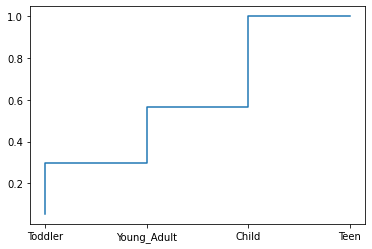

In [40]:
plt.plot(cdf.values,ds = 'steps')
#plt.ylabel(cdf.index.tolist())
plt.xticks(range(len(cdf.index.tolist())) , cdf.index.tolist())


<AxesSubplot:xlabel='AgeGrp', ylabel='Proportion'>

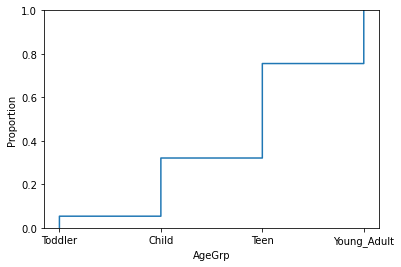

In [115]:
sns.ecdfplot(data=df, x="AgeGrp")

<AxesSubplot:xlabel='LungCap', ylabel='Proportion'>

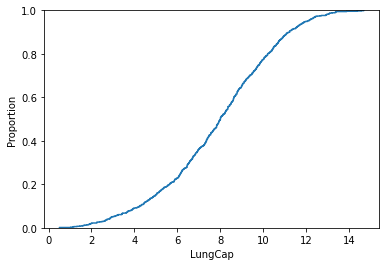

In [116]:
sns.ecdfplot(data=df, x="LungCap")

<AxesSubplot:xlabel='LungCap', ylabel='Proportion'>

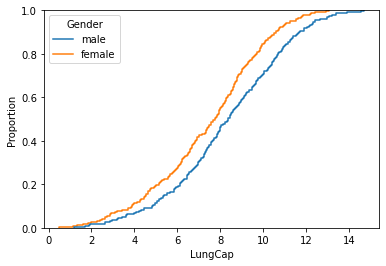

In [119]:
sns.ecdfplot(data=df, x="LungCap",hue = "Gender")

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
mall = pd.read_csv("Mall_Customers.csv")
mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [128]:
import statsmodels.api as sm

In [157]:
min = mall["Age"].min()
max = mall["Age"].max()
mid1 = mall["Age"].mean()
mid2 = mall["Age"].mean()+mall["Age"].mean()/2

print("min", min)
print("max" , max)
print("mean", mid1)
print("median", mid2)


min 18
max 70
mean 38.85
median 58.275000000000006


In [7]:
mall["Age"].mean()-mall["Age"].mean()/2

19.425

In [160]:
mall["AgeGroup"] = pd.cut(x=mall["Age"],bins = [min, mid1,mid2,max],
                          labels = ["young","Middle","Senior"])

In [161]:
mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup
0,1,Male,19,15,39,young
1,2,Male,21,15,81,young
2,3,Female,20,16,6,young
3,4,Female,23,16,77,young
4,5,Female,31,17,40,young
...,...,...,...,...,...,...
195,196,Female,35,120,79,young
196,197,Female,45,126,28,Middle
197,198,Male,32,126,74,young
198,199,Male,32,137,18,young


sns.ecdfplot(data =mall, x = "AnnualInc", hue = "AgeGroup")

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Proportion'>

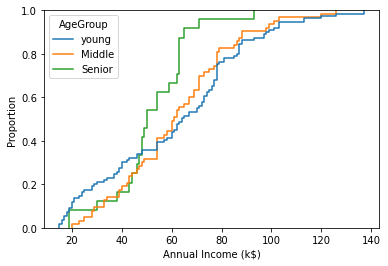

In [162]:
sns.ecdfplot(data =mall, x = "Annual Income (k$)", hue = "AgeGroup")

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Proportion'>

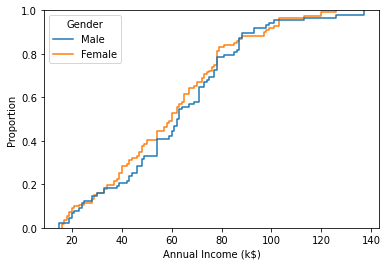

In [163]:
sns.ecdfplot(data =mall, x = "Annual Income (k$)", hue = "Gender")

In [167]:
min = mall["Spending Score (1-100)"].min()
max = mall["Spending Score (1-100)"].max()
mall['SpendPower'] = pd.cut(x =  mall["Spending Score (1-100)"],
           bins = [min,20,60,max],
           labels = ['low','medium','high']
           ) 
mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,SpendPower
0,1,Male,19,15,39,young,medium
1,2,Male,21,15,81,young,high
2,3,Female,20,16,6,young,low
3,4,Female,23,16,77,young,high
4,5,Female,31,17,40,young,medium
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,young,high
196,197,Female,45,126,28,Middle,medium
197,198,Male,32,126,74,young,high
198,199,Male,32,137,18,young,low


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Proportion'>

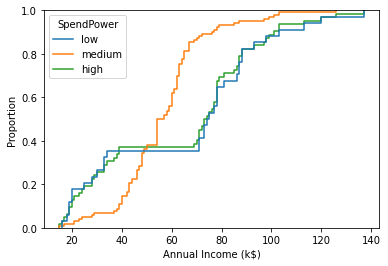

In [168]:
sns.ecdfplot(data =mall, x = "Annual Income (k$)", hue = "SpendPower")